In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Set random seed for reproducibility
np.random.seed(42)

# Step 2: Generate synthetic data (features X)
m = 100  # Number of samples
n = 5  # Number of features

# Generate random feature data (X) - 100 samples, 5 features
X = np.random.rand(m, n)

# Step 3: Define true weights (theta) for the features
theta_true = np.array([3, 2, -1, 4, 5]).reshape(-1, 1)

# Step 4: Generate the target variable (y) with some noise
noise = np.random.randn(m, 1) * 0.5  # Gaussian noise
y = X.dot(theta_true) + noise  # Linear model with noise

# Step 5: Create a DataFrame to display the data
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n)])
df['Target'] = y

# Show the first few rows of the dataset
print(df.head())

# Show the true weights (theta)
print("True weights (theta):", theta_true.flatten())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5    Target
0   0.374540   0.950714   0.731994   0.598658   0.156019  5.638660
1   0.155995   0.058084   0.866176   0.601115   0.708073  6.600883
2   0.020584   0.969910   0.832443   0.212339   0.181825  3.402824
3   0.183405   0.304242   0.524756   0.431945   0.291229  3.529416
4   0.611853   0.139494   0.292145   0.366362   0.456070  5.118992
True weights (theta): [ 3  2 -1  4  5]


In [3]:
df_train = df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']]

In [4]:
df_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.374540,0.950714,0.731994,0.598658,0.156019
1,0.155995,0.058084,0.866176,0.601115,0.708073
2,0.020584,0.969910,0.832443,0.212339,0.181825
3,0.183405,0.304242,0.524756,0.431945,0.291229
4,0.611853,0.139494,0.292145,0.366362,0.456070


In [5]:
df_target = df['Target']

In [6]:
df_target.head()

0    5.638660
1    6.600883
2    3.402824
3    3.529416
4    5.118992
Name: Target, dtype: float64

In [7]:
X_train = df_train.values
y = df_target.values

In [8]:
def cost_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    cost = np.sum((f_wb - y)**2)
    total_cost = 1/(2*m) * cost
    return total_cost

In [9]:
# w_true = np.array([3, 2, -1, 4, 5])
# b = 0
# cost_function(X_train, y, w_true, b)

0.14590884331656717

In [10]:
def gradient_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    error = f_wb - y
    dj_dw = 1/m * x.T.dot(error)
    dj_db = 1/m * np.sum(error)
    return dj_dw, dj_db

In [11]:
# w_true = np.array([0, 0, 0, 0, 0])
# b = 0
# gradient_function(X_train, y, w_true, b)

(array([-3.48742375, -3.41621774, -2.96895283, -3.81504735, -3.42300547]),
 -6.423808775055636)

In [14]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    cost_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost_history.append(cost_function(x, y, w, b))
    return w, b, cost_history  

Final values of w is: [ 2.86852534  1.78771603 -0.76846665  4.01913119  4.84288822]
Final value of b is: 0.11860596874677819


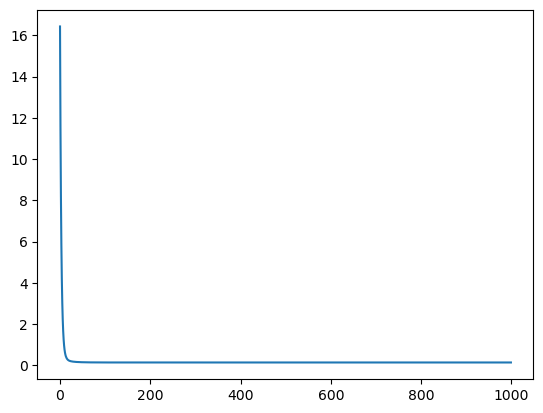

In [72]:
w_in = np.array([0., 0, 0, 0, 0])
b_in = 0
alpha = 8.0e-1
iterations = 100000
w_final, b_final, j_history = gradient_descent(X_train, y, w_in, b_in, alpha, iterations, 
                                               cost_function, gradient_function)
print(f"Final values of w is: {w_final.flatten()}")
print(f"Final value of b is: {b_final}")
plt.plot(j_history[:1000]);

In [74]:
y_pred = X_train.dot(w_final) + b_final

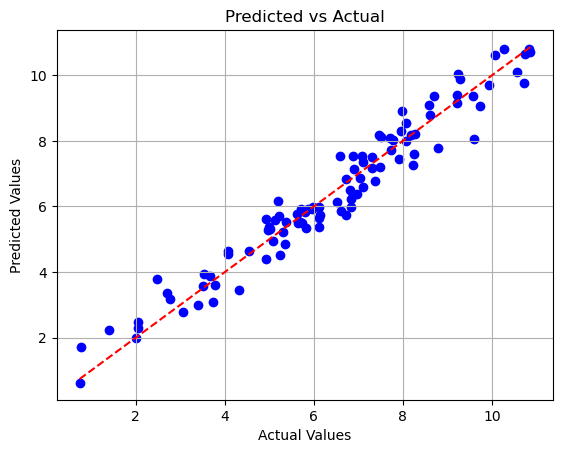

In [78]:
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)